In [1]:
import numpy as np
import pandas as pd
import json
import re

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

# Result Analysis

## Load Data

In [3]:
search_query = ["technology", "for", "peacebuilding"]

In [4]:
file_name = "_".join(search_query) + "_references" +  ".json"; file_name

'technology_for_peacebuilding_references.json'

In [5]:
references = json.load( open( file_name ) )

## Generalize reference names

In [6]:
def process_name(name):
    alphanumeric = re.sub("[^\w\s]", "", name)
    return alphanumeric.lower()

In [7]:
references = { article_name : [process_name(reference_name) for reference_name in reference_list if(len(reference_name) > 0) ] for article_name, reference_list in references.items()}

## Most Cited References

In [8]:
flat_references = [reference_name for reference_list in references.values() for reference_name in reference_list]

['peacebuilding as a gendered process',
 'service delivery indicators  educationhealth',
 'africa development indicators 200809 youth and employment in africa  the potential the problem the promise',
 'a journey through 10 countries',
 'turkeys government forms 6000member social media team',
 'ethnic conflict goes mobile mobile technologys effect on the opportunities and motivations for violent collective action',
 'peacebuilding what is in a name',
 'africas mobile phone industry booming',
 'inequality in the world polity the structure of international organization',
 'examining peaceoriented media in areas of violent conflict',
 'hearing ordinary voices cultural studies vernacular creativity and digital storytelling',
 'bereaved',
 'the concept of power',
 'the internets impact on activism the case of burma',
 'bosnian lawmakers fail to meet babylution protest demands',
 'who really supports reconciliation in sri lanka',
 'police in sri lanka show their true saffron colours',
 'a rea

In [9]:
reference_occurances = {}
for name in flat_references:
    reference_occurances[name] = reference_occurances.get(name, 0) + 1

In [10]:
sorted(reference_occurances.items(), key = lambda x: x[1], reverse = True)

[('introduction', 16),
 ('violence peace and peace research', 9),
 ('hybrid peace the interaction between topdown and bottomup peace', 8),
 ('cultural violence', 6),
 ('avatars of eurocentrism in the critique of the liberal peace', 6),
 ('empowerment or imposition dilemmas of local ownership in postconflict peacebuilding processes',
  6),
 ('rido clan feuding and conflict management in mindanao', 6),
 ('indigenous peacemaking versus the liberal peace', 5),
 ('precarious peacebuilding friction in globallocal encounters', 5),
 ('the local turn in peace building a critical agenda for peace', 5),
 ('becoming liberal unbecoming liberalism liberallocal hybridity via the everyday as a response to the paradoxes of liberal peacebuilding',
  5),
 ('the securitydevelopment nexus and the rise of antiforeign policy', 5),
 ('armed conflict 19462001 a new dataset', 5),
 ('peacebuilding what is in a name', 4),
 ('the myth of liberal peacebuilding', 4),
 ('resistance and the postliberal peace', 4),
 ('

## Reference Matrix

In [11]:
article_names = list(references.keys())
reference_names = list(reference_occurances.keys())

In [12]:
reference_matrix = np.array([ np.array([1 if(reference in references[article]) else 0 for reference in reference_names]) for article in article_names])

In [13]:
reference_matrix.shape

(186, 4073)

In [14]:
df = pd.DataFrame(data = reference_matrix, index = article_names, columns = reference_names)

In [16]:
article_amount = len(article_names)
reference_limit = 3

In [18]:
column_filter = [index for index, name in enumerate(reference_names) if(df[name].mean() >= reference_limit/article_amount)]

In [20]:
df2 = df.iloc[:, column_filter]; df2.shape

(186, 46)

In [22]:
row_fitler = [index for index, value in enumerate(article_names) if(df2.loc[value].mean() != 0)]

In [23]:
df3 = df2.iloc[row_fitler, :]; df3.shape

(70, 46)

# PCA

In [25]:
data = np.array(df3); data.shape

(70, 46)

In [26]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]]); X.shape

(6, 2)

In [27]:
pca = PCA(n_components = 2)

In [28]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
components = pca.components_.T ; components.shape

(46, 2)

In [37]:
s = [reference_occurances[column_name] * 8 for column_name in df3.columns]

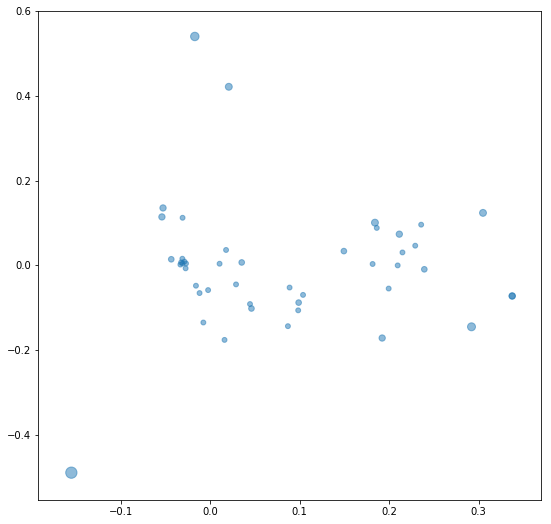

In [38]:
plt.figure(figsize = (9,9))
plt.scatter(components[:, 0], components[:, 1], s  = s, alpha = 0.5)